In [30]:
import pandas as pd
from IPython.display import display

# Cargar el archivo Excel
archivo_excel = r'C:\Users\USUARIO\Desktop\nuevo\BD3.xlsx'
Data1 = pd.read_excel(archivo_excel)

# Mostrar las primeras filas del DataFrame
display(Data1.head())

,N°,name,IUPAC_name,SMILES,CID,logBB,BBB+/BBB-,Inchi,threshold,reference,group,comments
0,1,sulphasalazine,2-hydroxy-5-[[4-(pyridin-2-ylsulfamoyl)phenyl]...,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,5339.0,-2.69,BBB-,InChI=1S/C18H14N4O5S/c23-16-9-6-13(11-15(16)18...,NaN,R2|R2|R25|R46|,A,NaN
1,2,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,3889.0,-2.52,BBB-,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,NaN,R25|,A,NaN
2,3,clioquinol,5-chloro-7-iodoquinolin-8-ol,Oc1c(I)cc(Cl)c2cccnc12,2788.0,-2.40,BBB-,InChI=1S/C9H5ClINO/c10-6-4-7(11)9(13)8-5(6)2-1...,NaN,R18|R26|R27|,A,NaN
3,4,bbcpd11 (cimetidine analog) (y-g13),2-[2-[(3-bromopyridin-2-yl)methylsulfanyl]ethy...,CCNC(=NCCSCc1ncccc1Br)NC#N,14022517.0,-2.15,BBB-,InChI=1S/C12H16BrN5S/c1-2-15-12(18-9-14)17-6-7...,NaN,R2|R2|R8|R40|R2|R2|R2|R2|R18|R21|R25|R25|R26|R...,A,NaN
4,5,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,18595497.0,-2.15,BBB-,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,NaN,R25|,A,NaN


In [2]:

"""
Exploración y Resumen de Propiedades Moleculares.
"""

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Número de filas y columnas
num_rows, num_columns = Data1.shape
print(f"Dimensiones del conjunto de datos: {num_rows} filas x {num_columns} columnas\n")

# Nombres de las variables con descripciones
variable_descriptions = {
    'N°': 'Número de identificación',
    'name': 'Nombre de la Molecula',
    'IUPAC_name': 'Nombre según la Unión Internacional de Química Pura y Aplicada (IUPAC)',
    'SMILES': 'Simplified Molecular Input Line Entry System (SMILES)',
    'CID': 'Chemical Identifier',
    'logBB': 'Coeficiente de partición octanol-agua (logBB)',
    'BBB+/BBB-': 'Barrera hematoencefálica (BBB) Atravieza/No atravieza ',
    'Inchi': 'Clave internacional normalizada de la InChI (IUPAC International Chemical Identifier)',
    'threshold': 'Umbral',
    'reference': 'Referencia temporal',
    'group': 'Grupo al que pertenece la molecula',
    'comments': 'Comentarios'
}

# Imprimir nombres de las variables con descripciones
print("Nombres de las variables con descripciones:")
for column in Data1.columns:
    print(f" - {column}: {variable_descriptions.get(column, 'Descripción no proporcionada')}")

# Tipos de datos de las variables
data_types = Data1.dtypes
print("\nTipos de datos de las variables:")
for column, dtype in data_types.items():
    print(f" - {column}: {dtype}")

# Datos nulos por variable
missing_data = Data1.isnull().sum()
print("\nDatos nulos por variable:")
for column, missing_count in missing_data.items():
    if missing_count > 0:
        print(f" - {column}: {missing_count} valores nulos")
    else:
        print(f" - {column}: No hay valores nulos")




Dimensiones del conjunto de datos: 7807 filas x 12 columnas

Nombres de las variables con descripciones:
 - N°: Número de identificación
 - name: Nombre de la Molecula
 - IUPAC_name: Nombre según la Unión Internacional de Química Pura y Aplicada (IUPAC)
 - SMILES: Simplified Molecular Input Line Entry System (SMILES)
 - CID: Chemical Identifier
 - logBB: Coeficiente de partición octanol-agua (logBB)
 - BBB+/BBB-: Barrera hematoencefálica (BBB) Atravieza/No atravieza 
 - Inchi: Clave internacional normalizada de la InChI (IUPAC International Chemical Identifier)
 - threshold: Umbral
 - reference: Referencia temporal
 - group: Grupo al que pertenece la molecula
 - comments: Comentarios

Tipos de datos de las variables:
 - N°: int64
 - name: object
 - IUPAC_name: object
 - SMILES: object
 - CID: float64
 - logBB: float64
 - BBB+/BBB-: object
 - Inchi: object
 - threshold: float64
 - reference: object
 - group: object
 - comments: object

Datos nulos por variable:
 - N°: No hay valores nul

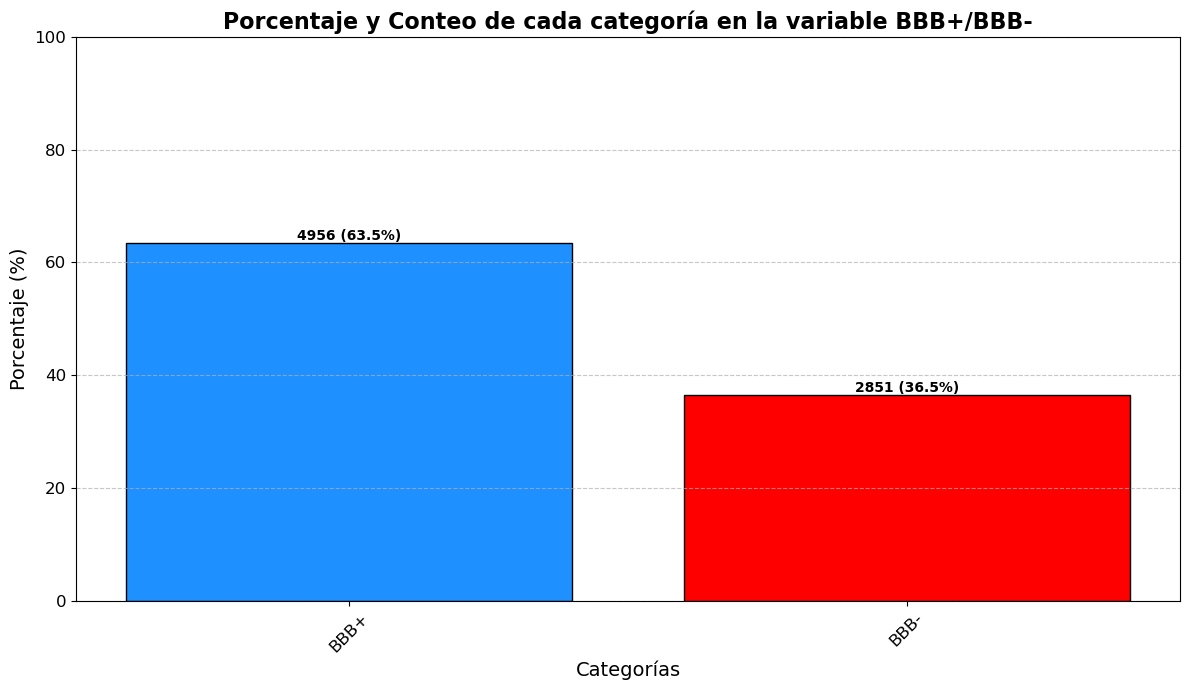

In [3]:
# Contar las ocurrencias de cada categoría en la variable 'BBB+/BBB-'
conteo = Data1['BBB+/BBB-'].value_counts()

# Calcular los porcentajes
porcentajes = (conteo / conteo.sum()) * 100

# Crear el gráfico de barras
plt.figure(figsize=(12, 7))
colors = ['#1E90FF', '#FF0000']  # Azul y rojo
bars = plt.bar(conteo.index, porcentajes.values, color=colors, edgecolor='Black')

# Añadir los valores numéricos y porcentajes encima de cada barra
for i, bar in enumerate(bars):
    yval = bar.get_height()
    count = conteo.iloc[i]  
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{count} ({yval:.1f}%)', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Configurar el gráfico
plt.title('Porcentaje y Conteo de cada categoría en la variable BBB+/BBB-', fontsize=16, fontweight='bold')
plt.xlabel('Categorías', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  
plt.yticks(fontsize=12)  
plt.ylim(0, 100)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir un fondo de color
plt.gca().set_facecolor('#FFFFFF')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

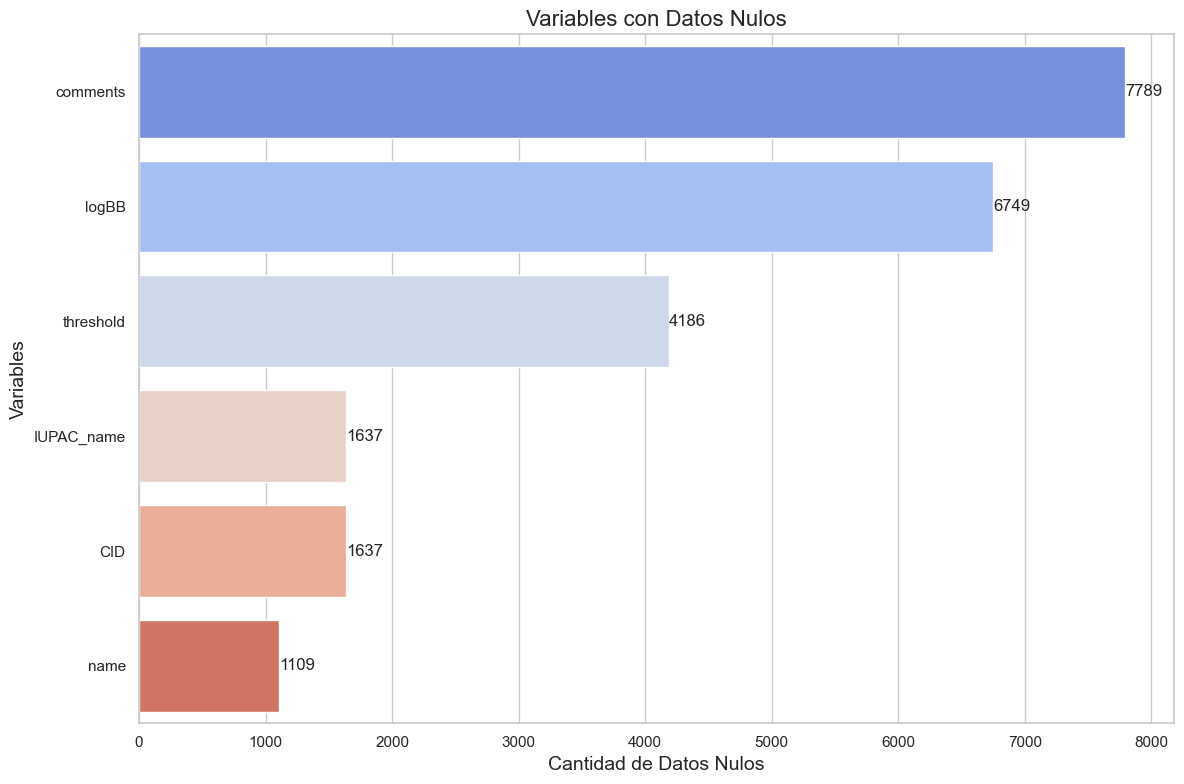

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suprimir advertencias futuras
warnings.simplefilter(action='ignore', category=FutureWarning)

# Configurar estilo de Seaborn
sns.set(style="whitegrid")

# Contar los datos nulos por variable
missing_data = Data1.isnull().sum()

# Filtrar para mostrar solo las variables que tienen datos nulos
missing_data = missing_data[missing_data > 0]

# Ordenar los datos nulos en orden descendente
missing_data = missing_data.sort_values(ascending=False)

# Visualizar los datos nulos en forma de gráfico de barras horizontales
plt.figure(figsize=(12, 8))  

# Cambiar la paleta a tonos de azul y rojos bajos, con más colores
palette = sns.color_palette("coolwarm", len(missing_data))  

sns.barplot(x=missing_data.values, y=missing_data.index, palette=palette, orient='h')
plt.title('Variables con Datos Nulos', fontsize=16)
plt.xlabel('Cantidad de Datos Nulos', fontsize=14)
plt.ylabel('Variables', fontsize=14)

# Agregar el texto con la cantidad de datos nulos en cada barra
for index, value in enumerate(missing_data):
    plt.text(value + 0.5, index, str(value), ha='left', va='center', fontsize=12)

plt.tight_layout()
plt.show()



In [5]:
from rdkit import Chem
import sys

# Función para validar los SMILES y filtrar las moléculas válidas
def validar_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return False
        Chem.SanitizeMol(mol)
        return True
    except:
        return False

# Aplicar la función para validar los SMILES y crear una columna 'SMILES_validos' en el DataFrame
Data1['SMILES_validos'] = Data1['SMILES'].apply(validar_smiles)

# Filtrar las moléculas válidas y experimentadas (que pasan BBB)
mol_validas_experimentadas = Data1[Data1['SMILES_validos'] & (Data1['BBB+/BBB-'] == 'BBB+')]

# Filtrar las moléculas válidas pero no experimentadas (que no pasan BBB)
mol_validas_no_experimentadas = Data1[Data1['SMILES_validos'] & (Data1['BBB+/BBB-'] == 'BBB-')]

# Calcular el número total de moléculas
total_moleculas = len(Data1)

# Calcular el número total de moléculas válidas y experimentadas
total_validas_experimentadas = len(mol_validas_experimentadas)

# Calcular el número total de moléculas válidas pero no experimentadas
total_validas_no_experimentadas = len(mol_validas_no_experimentadas)

# Mostrar resumen
print("Resumen del análisis de permeabilidad de las moléculas:")
print("------------------------------------------------------")
print("Total de moléculas:", total_moleculas)
print("Moléculas válidas y experimentadas (pasan BBB):", total_validas_experimentadas)
print("Moléculas válidas pero no experimentadas (no pasan BBB):", total_validas_no_experimentadas)

Resumen del análisis de permeabilidad de las moléculas:
------------------------------------------------------
Total de moléculas: 7807
Moléculas válidas y experimentadas (pasan BBB): 4956
Moléculas válidas pero no experimentadas (no pasan BBB): 2851


In [6]:
import pandas as pd
from rdkit import Chem, RDLogger
from chembl_structure_pipeline.standardizer import (
    get_parent_mol, update_mol_valences, kekulize_mol, flatten_tartrate_mol,
    normalize_mol, uncharge_mol, cleanup_drawing_mol)
from tqdm import tqdm

# Suprimir mensajes de RDKit
RDLogger.DisableLog('rdApp.*')

# Funciones de estandarización
def standardize_molecule(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return None
        mol = get_parent_mol(mol)
        mol = update_mol_valences(mol)
        mol = kekulize_mol(mol)
        mol = flatten_tartrate_mol(mol)
        mol = normalize_mol(mol)
        mol = uncharge_mol(mol)
        mol = cleanup_drawing_mol(mol)
        return Chem.MolToSmiles(mol, isomericSmiles=True)
    except Exception:
        return None

# Función para limpiar el DataFrame
def clean_molecules(df):
    problematic_smiles = []

    for idx, row in tqdm(df.iterrows(), total=df.shape[0], desc="Standardizing molecules"):
        smiles = row['SMILES']
        standardized_smiles_str = standardize_molecule(smiles)
        if standardized_smiles_str and standardized_smiles_str != smiles:
            problematic_smiles.append((smiles, standardized_smiles_str))

    problematic_df = pd.DataFrame(problematic_smiles, columns=['Original_SMILES', 'Standardized_SMILES'])
    return problematic_df

# Verificar que el DataFrame esté cargado
try:
    # Usamos el DataFrame ya cargado llamado Data1
    Data1_copy = Data1.copy()  # Crear una copia para evitar alterar el original

    # Limpiar las moléculas con problemas en la copia del DataFrame
    problematic_data = clean_molecules(Data1_copy)
    
    # Validar si hay problemas y almacenar el resultado en una variable
    has_problematic_molecules = not problematic_data.empty

except Exception as e:
    has_problematic_molecules = True  # Si ocurre un error, se considera que hay problemas

# En lugar de imprimir, solo establecer una variable que indique si hay problemas
print(f"Data1 has problematic molecules: {has_problematic_molecules}")



[20:51:24] Initializing Normalizer
Standardizing molecules: 100%|██████████| 7807/7807 [00:35<00:00, 220.81it/s]

Data1 has problematic molecules: False


### Título: Evaluación y Clasificación de Tipos de SMILES 

En la gestión de datos químicos y moleculares, una tarea crucial es la clasificación y estandarización de representaciones SMILES (Simplified Molecular Input Line Entry System). Este proceso no solo facilita la interpretación de los datos, sino que también asegura la consistencia en el análisis de moléculas. La clasificación precisa de los SMILES permite identificar y tratar adecuadamente las diferentes formas en que una molécula puede ser representada en la base de datos.

Importancia de Generar Ambos Tipos de SMILES
Razón para Generar Ambos

Comparación Completa: La generación de ambos tipos de SMILES—canónico e isomérico—permite comparar el SMILES original con dos formas estandarizadas. Esto ayuda a determinar el tipo de representación que se ha utilizado. La forma canónica es única para cada molécula y no tiene isomería, mientras que la forma isomérica considera la estereoquímica, lo que puede resultar en diferentes representaciones para la misma estructura. Esta comparación es crucial para identificar si un SMILES es canónico, isomérico, estereoquímico, o quiral.

Validación de Información: En algunos casos, un SMILES puede estar en una forma isomérica o estereoquímica que no coincide con la forma canónica. La validación mediante la comparación de ambos tipos ayuda a identificar cómo está representada la molécula. Esto es fundamental para asegurar la integridad de los datos y evitar errores que podrían surgir de inconsistencias en las representaciones de SMILES.

Clasificación Precisa: Aunque el objetivo final es clasificar los SMILES en categorías como canónico, isomérico, estereoquímico o quiral, generar ambos tipos proporciona una base sólida para una clasificación más precisa. Esta metodología permite una identificación más rigurosa y fiable de las diferentes representaciones de SMILES presentes en el conjunto de datos.

In [7]:
from rdkit import Chem
import pandas as pd

def clasificar_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return "Inválido"
        
        # Generar SMILES canónico
        can_smiles = Chem.MolToSmiles(mol, isomericSmiles=False, canonical=True)
        
        # Generar SMILES isomérico
        iso_smiles = Chem.MolToSmiles(mol, isomericSmiles=True, canonical=True)
        
        if smiles == can_smiles:
            return "Canónico"
        elif smiles == iso_smiles:
            return "Isomérico"
        elif '/' in smiles or '\\' in smiles:
            return "Estereoquímico"
        elif '@' in smiles:
            return "Quiral"
        else:
            return "No estándar"
    except:
        return "Inválido"


# Aplicar la función para clasificar los SMILES
Data1['Tipo_SMILES'] = Data1['SMILES'].apply(clasificar_smiles)

# Contar los tipos de SMILES
conteo_tipos = Data1['Tipo_SMILES'].value_counts()

# Calcular el porcentaje de cada tipo de SMILES
total_smiles = len(Data1)
porcentaje_tipos = (conteo_tipos / total_smiles) * 100

# Crear un DataFrame para mostrar la información de manera clara
resultado = pd.DataFrame({
    'Cantidad': conteo_tipos,
    'Porcentaje': porcentaje_tipos
})

print("Clasificación de SMILES:")
print(resultado)


Clasificación de SMILES:
                Cantidad  Porcentaje
Tipo_SMILES                         
Isomérico           4129   52.888433
Canónico            3294   42.192904
Quiral               359    4.598437
Estereoquímico        25    0.320225





Importancia de Trabajar con Múltiples Formatos de SMILES en Análisis Molecular

Trabajar con múltiples formatos de SMILES, en lugar de restringirse a uno solo, proporciona una visión más completa y robusta en el análisis molecular. Cada formato, como el canónico, isomérico, estereoquímico y quiral, aporta una perspectiva única que puede revelar diferentes aspectos de la estructura y comportamiento de las moléculas. Por ejemplo, los SMILES canónicos garantizan una representación uniforme y libre de ambigüedades, facilitando la comparación y agrupación de moléculas similares. Sin embargo, los formatos isoméricos y estereoquímicos son cruciales para capturar la información sobre la disposición espacial de los átomos y la quiralidad, que pueden ser determinantes en la actividad biológica y las interacciones moleculares. Al integrar y analizar diversos formatos, se pueden identificar y comprender mejor las variaciones estructurales que afectan las propiedades y el comportamiento de las moléculas. Esto es especialmente importante en campos como el desarrollo de fármacos y la química medicinal, donde las diferencias sutiles en la configuración pueden tener un impacto significativo. En resumen, el uso de múltiples formatos de SMILES en el análisis molecular enriquece la comprensión de las estructuras moleculares y mejora la precisión de los modelos predictivos, proporcionando una base más sólida para la toma de decisiones y el desarrollo de nuevas moléculas.

### Distribución de Tipos de SMILES en Relación con la Permeabilidad de la Barrera Hematoencefálica (BBB+/BBB-)

In [9]:
"""
### Estandarización de SMILES y su Impacto en Modelos de Predicción

#### Pérdida de Información
La estandarización de SMILES puede llevar a la pérdida de información crucial para modelos de predicción que buscan identificar moléculas que atraviesan la barrera hematoencefálica (BBB).

#### Clasificación de SMILES
Los SMILES se clasifican en tipos como:
- **Canónico**
- **Estereoquímico**
- **Isomérico**
- **Quiral**

Esta clasificación muestra cómo diferentes representaciones moleculares pueden influir en la relación con la BBB.

#### Resultados
Los resultados indican la proporción de cada tipo de SMILES asociado con:
- **BBB+**: Moléculas que atraviesan la barrera hematoencefálica.
- **BBB-**: Moléculas que no la atraviesan.

#### Implicaciones de la Estandarización
La estandarización puede simplificar la información, perdiendo detalles sobre estereoquímica o quiralidad que podrían ser relevantes para la precisión del modelo.
"""
from rdkit import Chem
import pandas as pd

# Función para clasificar los SMILES
def clasificar_smiles(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            return "Inválido"
        
        # Generar SMILES canónico
        can_smiles = Chem.MolToSmiles(mol, isomericSmiles=False, canonical=True)
        
        # Generar SMILES isomérico
        iso_smiles = Chem.MolToSmiles(mol, isomericSmiles=True, canonical=True)
        
        if smiles == can_smiles:
            return "Canónico"
        elif smiles == iso_smiles:
            return "Isomérico"
        elif '/' in smiles or '\\' in smiles:
            return "Estereoquímico"
        elif '@' in smiles:
            return "Quiral"
        else:
            return "No estándar"
    except:
        return "Inválido"

# Verificar que Data1 esté cargada
if 'Data1' in globals():
    # Crear una copia temporal para evitar alterar la base de datos original
    Data1_temp = Data1.copy()

    # Aplicar la función para clasificar los SMILES en la copia temporal
    Data1_temp['Tipo_SMILES'] = Data1_temp['SMILES'].apply(clasificar_smiles)

    # Contar los tipos de SMILES por categoría de BBB en la copia temporal
    conteo_tipos_bbb = Data1_temp.groupby('BBB+/BBB-')['Tipo_SMILES'].value_counts().unstack(fill_value=0)

    # Calcular el porcentaje de cada tipo de SMILES dentro de cada categoría de BBB
    porcentaje_tipos_bbb = (conteo_tipos_bbb / conteo_tipos_bbb.sum()) * 100

    # Imprimir resultados
    print("Porcentaje de tipos de SMILES relacionados con BBB+/BBB-:")
    print(porcentaje_tipos_bbb)
else:
    print("La base de datos 'Data1' no está cargada.")


Porcentaje de tipos de SMILES relacionados con BBB+/BBB-:
Tipo_SMILES   Canónico  Estereoquímico  Isomérico     Quiral
BBB+/BBB-                                                   
BBB+         63.812993            20.0  64.858319  47.632312
BBB-         36.187007            80.0  35.141681  52.367688


"""
La estandarización de SMILES puede llevar a la pérdida de información crucial para modelos de predicción que buscan identificar moléculas que atraviesan la barrera hematoencefálica (BBB). La clasificación de SMILES en tipos como Canónico, Estereoquímico, Isomérico y Quiral muestra cómo diferentes representaciones moleculares pueden influir en la relación con la BBB. Los resultados indican la proporción de cada tipo de SMILES asociado con moléculas que atraviesan (BBB+) y no atraviesan (BBB-) la barrera hematoencefálica. La estandarización puede simplificar la información, perdiendo detalles sobre estereoquímicas o quiralidad que podrían ser relevantes para la precisión del modelo.
"""

In [10]:
"""
La estandarización de SMILES a su forma canónica es un paso crucial en el procesamiento de datos moleculares que garantiza la consistencia en la representación de las moléculas.
Al convertir todas las representaciones de SMILES a un formato canónico, se elimina la variabilidad que puede surgir de diferentes convenciones o formatos, 
permitiendo comparaciones más precisas y uniformes entre moléculas. Este proceso facilita la identificación y agrupación de moléculas similares,
la detección de duplicados y la realización de análisis más fiables sobre las propiedades moleculares. Además, 
la estandarización mejora la integridad de los datos al evitar inconsistencias derivadas de representaciones variadas,
 lo cual es esencial para asegurar la calidad de los modelos de predicción y análisis subsiguientes. 
 La mayoría de las herramientas y modelos de aprendizaje automático están optimizados para trabajar con SMILES canónicos, 
 por lo que esta estandarización asegura la compatibilidad y evita errores en el análisis. En resumen, 
 la conversión a SMILES canónicos simplifica la gestión de grandes conjuntos de datos moleculares, 
 reduciendo la complejidad y mejorando la precisión de los análisis posteriores.
"""

'\nLa estandarización de SMILES a su forma canónica es un paso crucial en el procesamiento de datos moleculares que garantiza la consistencia en la representación de las moléculas.\nAl convertir todas las representaciones de SMILES a un formato canónico, se elimina la variabilidad que puede surgir de diferentes convenciones o formatos, \npermitiendo comparaciones más precisas y uniformes entre moléculas. Este proceso facilita la identificación y agrupación de moléculas similares,\nla detección de duplicados y la realización de análisis más fiables sobre las propiedades moleculares. Además, \nla estandarización mejora la integridad de los datos al evitar inconsistencias derivadas de representaciones variadas,\n lo cual es esencial para asegurar la calidad de los modelos de predicción y análisis subsiguientes. \n La mayoría de las herramientas y modelos de aprendizaje automático están optimizados para trabajar con SMILES canónicos, \n por lo que esta estandarización asegura la compatibil

In [8]:
# Función para convertir SMILES a SMILES canónicos o isoméricos
def convert_to_smiles(mol, isomeric=True):
    """Convierte una molécula RDKit a SMILES en formato canónico o isomérico."""
    if mol is None:
        return None
    return Chem.MolToSmiles(mol, isomericSmiles=isomeric, canonical=True)

# Función para procesar los SMILES y obtener sus versiones canónicas e isoméricas
def process_smiles(smiles):
    """Procesa SMILES para obtener sus versiones canónicas e isoméricas."""
    try:
        mol = Chem.MolFromSmiles(smiles)
        canonical_smiles = convert_to_smiles(mol, isomeric=False)
        isomeric_smiles = convert_to_smiles(mol, isomeric=True)
        return canonical_smiles, isomeric_smiles
    except Exception as e:
        print(f"Error al procesar SMILES: {e}")
        return None, None

# Añadir columnas de SMILES canónicos e isoméricos directamente a Data1
def update_smiles_columns(df):
    """Añade columnas de SMILES canónicos e isoméricos a un DataFrame existente."""
    # Aplicar la función para obtener SMILES canónicos e isoméricos
    df[['SMILES_CANONICOS', 'SMILES_ISOMERICOS']] = df['SMILES'].apply(lambda x: pd.Series(process_smiles(x)))

    return df

# Supongamos que Data1 ya está cargado en el entorno de trabajo
# Actualizar Data1 con SMILES canónicos e isoméricos
Data1 = update_smiles_columns(Data1)

# Imprimir las primeras filas del DataFrame actualizado usando display
display(Data1.head())



,N°,name,IUPAC_name,SMILES,CID,logBB,BBB+/BBB-,Inchi,threshold,reference,group,comments,SMILES_validos,Tipo_SMILES,SMILES_CANONICOS,SMILES_ISOMERICOS
0,1,sulphasalazine,2-hydroxy-5-[[4-(pyridin-2-ylsulfamoyl)phenyl]...,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,5339.0,-2.69,BBB-,InChI=1S/C18H14N4O5S/c23-16-9-6-13(11-15(16)18...,NaN,R2|R2|R25|R46|,A,NaN,True,Canónico,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O,O=C(O)c1cc(N=Nc2ccc(S(=O)(=O)Nc3ccccn3)cc2)ccc1O
1,2,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,3889.0,-2.52,BBB-,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,NaN,R25|,A,NaN,True,Canónico,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...,COC1(NC(=O)C(C(=O)O)c2ccc(O)cc2)C(=O)N2C(C(=O)...
2,3,clioquinol,5-chloro-7-iodoquinolin-8-ol,Oc1c(I)cc(Cl)c2cccnc12,2788.0,-2.40,BBB-,InChI=1S/C9H5ClINO/c10-6-4-7(11)9(13)8-5(6)2-1...,NaN,R18|R26|R27|,A,NaN,True,Canónico,Oc1c(I)cc(Cl)c2cccnc12,Oc1c(I)cc(Cl)c2cccnc12
3,4,bbcpd11 (cimetidine analog) (y-g13),2-[2-[(3-bromopyridin-2-yl)methylsulfanyl]ethy...,CCNC(=NCCSCc1ncccc1Br)NC#N,14022517.0,-2.15,BBB-,InChI=1S/C12H16BrN5S/c1-2-15-12(18-9-14)17-6-7...,NaN,R2|R2|R8|R40|R2|R2|R2|R2|R18|R21|R25|R25|R26|R...,A,NaN,True,Canónico,CCNC(=NCCSCc1ncccc1Br)NC#N,CCNC(=NCCSCc1ncccc1Br)NC#N
4,5,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...,18595497.0,-2.15,BBB-,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,NaN,R25|,A,NaN,True,Isomérico,CN1CCC23c4c5ccc(OC6OC(C(=O)O)C(O)C(O)C6O)c4OC2...,CN1CC[C@]23c4c5ccc(OC6O[C@H](C(=O)O)[C@@H](O)[...


In [9]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from chembl_structure_pipeline.standardizer import (
    get_parent_mol, update_mol_valences, kekulize_mol, normalize_mol, uncharge_mol
)
from chembl_structure_pipeline.exclude_flag import exclude_flag

metal_atoms = {3, 4, 11, 12, 13, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
               29, 30, 31, 32, 34, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
               47, 48, 49, 50, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
               66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
               81, 82, 83, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,
               99, 100, 101, 102, 103}
heavy_atoms = {21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34,
               37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
               50, 51, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
               65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
               78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90,
               91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102,
               103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
               114, 115, 116, 117, 118}

unwanted_atom_dict = {
    "metal_atoms": metal_atoms,
    "heavy_atoms": heavy_atoms,
}

def skip_problematic_molecules(df, smi_column="SMILES", output_column="SMILES_fixed"):
    for idx, row in df.iterrows():
        try:
            mol = Chem.MolFromSmiles(row[smi_column])
            if mol is not None and mol.GetNumAtoms() != 0:
                df.loc[idx, output_column] = Chem.MolToSmiles(mol, canonical=True)
            else:
                df.loc[idx, output_column] = ""
        except:
            df.loc[idx, output_column] = ""
    
    df = df[df[output_column] != ""]
    return df.reset_index(drop=True)

def filter_restricted_atoms(df, unwanted_atoms="heavy_atoms", smi_column="SMILES_fixed"):
    unwanted_atom_set = unwanted_atom_dict.get(unwanted_atoms)
    for idx, row in df.iterrows():
        if row[smi_column] != "":
            try:
                mol = Chem.MolFromSmiles(row[smi_column])
                atom_list = [atom.GetAtomicNum() for atom in mol.GetAtoms()]
                if not set(atom_list).isdisjoint(unwanted_atom_set):
                    df.loc[idx, smi_column] = ""
            except AttributeError:
                continue
    
    df = df[df[smi_column] != ""]
    return df.reset_index(drop=True)

def handle_solvents_salts(df, smi_column="SMILES_fixed"):
    for idx, row in df.iterrows():
        if row[smi_column] != "":
            mol = Chem.MolFromSmiles(row[smi_column])
            mol_new, _ = get_parent_mol(mol, neutralize=False, check_exclusion=True, verbose=False)
            df.loc[idx, smi_column] = Chem.MolToSmiles(mol_new, canonical=True)
    
    df = df[df[smi_column] != ""]
    return df.reset_index(drop=True)

def standardize_molecules(df, smi_column="SMILES_fixed"):
    for idx, row in df.iterrows():
        if row[smi_column] != "":
            mol = Chem.MolFromSmiles(row[smi_column])
            if not exclude_flag(mol, includeRDKitSanitization=False):
                mol = update_mol_valences(mol)
                mol = kekulize_mol(mol)
                mol = normalize_mol(mol)
                mol = uncharge_mol(mol)
                df.loc[idx, smi_column] = Chem.MolToSmiles(mol, canonical=True)
    
    df = df[df[smi_column] != ""]
    return df.reset_index(drop=True)

def neutralize_charges(smiles):
    reactions = [
        ('[n+;H]', 'n'),
        ('[N+;!H0]', 'N'),
        ('[$([O-]);!$([O-][#7])]', 'O'),
        ('[S-;X1]', 'S'),
        ('[$([N-;X2]S(=O)=O)]', 'N'),
        ('[$([N-;X2][C,N]=C)]', 'N'),
        ('[n-]', '[nH]'),
        ('[$([S-]=O)]', 'S'),
        ('[$([N-]C=O)]', 'N'),
    ]
    reactions = [(Chem.MolFromSmarts(x), Chem.MolFromSmiles(y, False)) for x, y in reactions]
    
    mol = Chem.MolFromSmiles(smiles)
    replaced = False
    for reactant, product in reactions:
        while mol.HasSubstructMatch(reactant):
            replaced = True
            rms = AllChem.ReplaceSubstructs(mol, reactant, product)
            mol = rms[0]
    if replaced:
        return Chem.MolToSmiles(mol, True)
    else:
        return smiles

def neutralize(df, smi_column="SMILES_fixed"):
    df[smi_column] = df[smi_column].apply(neutralize_charges)
    return df

def clean_molecules(df, unwanted_atoms="heavy_atoms"):
    df["SMILES_fixed"] = ""
    df = skip_problematic_molecules(df)
    df = handle_solvents_salts(df)
    df = neutralize(df)
    df = filter_restricted_atoms(df, unwanted_atoms)
    df = standardize_molecules(df)
    df = skip_problematic_molecules(df, smi_column="SMILES_fixed", output_column="SMILES_final")
    
    # Ordenar el resultado (ajuste esto según las columnas de su DataFrame)
    if "BBB+/BBB-" in df.columns and "CID" in df.columns:
        df = df.sort_values(by=["BBB+/BBB-", "SMILES_final", "CID"])
    
    return df

# Asumiendo que Data1 es su DataFrame
Data1 = clean_molecules(Data1)

# Guardar el resultado (ajuste el nombre del archivo según sus necesidades)
Data1.to_excel("Data1_cleaned.xlsx", index=None, engine="openpyxl")

print("Moléculas originales:", len(Data1))
print("Moléculas después de la limpieza:", len(Data1[Data1["SMILES_final"] != ""]))

Moléculas originales: 7807
Moléculas después de la limpieza: 7807


In [10]:
import pandas as pd

def check_nulls(df):
    # Contar los valores nulos en cada columna
    null_counts = df.isnull().sum()
    
    # Filtrar las columnas que tienen valores nulos
    null_columns = null_counts[null_counts > 0]
    
    if len(null_columns) > 0:
        print("Columnas con valores nulos y sus respectivas cantidades:")
        for column, count in null_columns.items():
            print(f"Columna: {column}, Valores nulos: {count}")
    else:
        print("No hay valores nulos en el DataFrame.")

# Asumiendo que el DataFrame se llama Data1
check_nulls(Data1)


Columnas con valores nulos y sus respectivas cantidades:
Columna: name, Valores nulos: 1109
Columna: IUPAC_name, Valores nulos: 1637
Columna: CID, Valores nulos: 1637
Columna: logBB, Valores nulos: 6749
Columna: threshold, Valores nulos: 4186
Columna: comments, Valores nulos: 7789


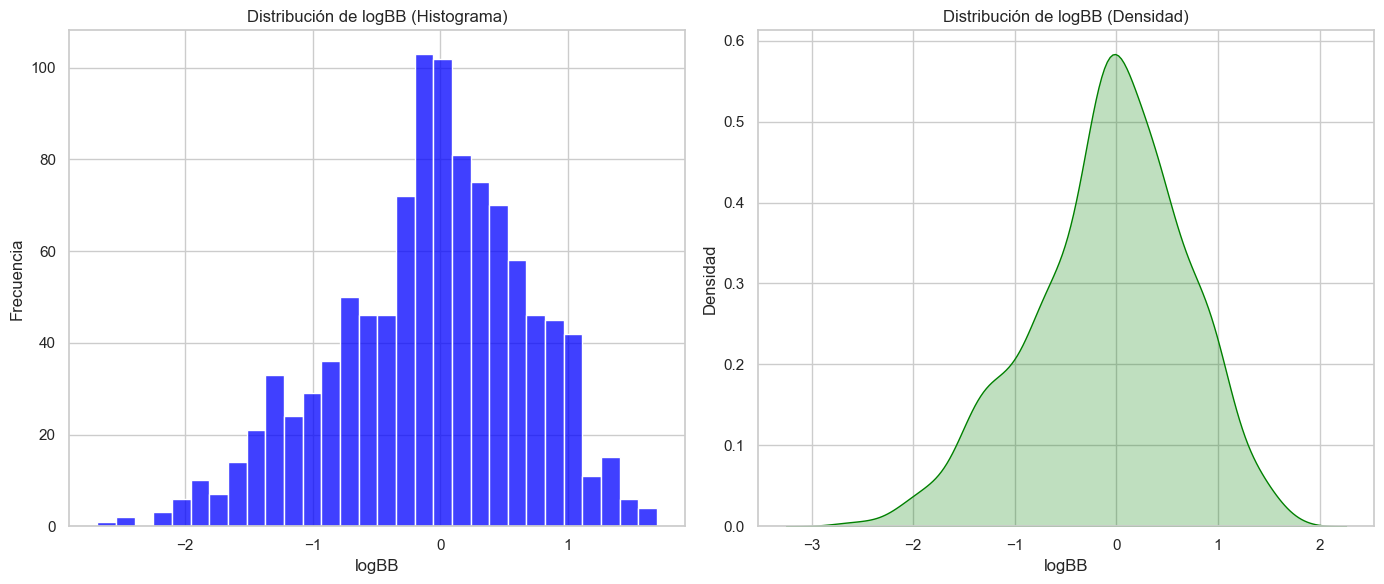

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura con dos subplots
plt.figure(figsize=(14, 6))

# Histograma
plt.subplot(1, 2, 1)
sns.histplot(Data1['logBB'].dropna(), bins=30, kde=False, color='blue')
plt.title('Distribución de logBB (Histograma)')
plt.xlabel('logBB')
plt.ylabel('Frecuencia')

# Gráfico de densidad
plt.subplot(1, 2, 2)
sns.kdeplot(Data1['logBB'].dropna(), shade=True, color='green')
plt.title('Distribución de logBB (Densidad)')
plt.xlabel('logBB')
plt.ylabel('Densidad')

# Mostrar los gráficos
plt.tight_layout()
plt.show()


In [12]:
# Obtener estadísticas descriptivas
stats = Data1.groupby('BBB+/BBB-')['logBB'].describe()
print(stats)


           count      mean       std   min   25%    50%     75%   max
BBB+/BBB-                                                            
BBB+       930.0  0.110860  0.577206 -1.00 -0.29  0.075  0.5075  1.70
BBB-       128.0 -1.449141  0.329777 -2.69 -1.57 -1.375 -1.2300 -1.01


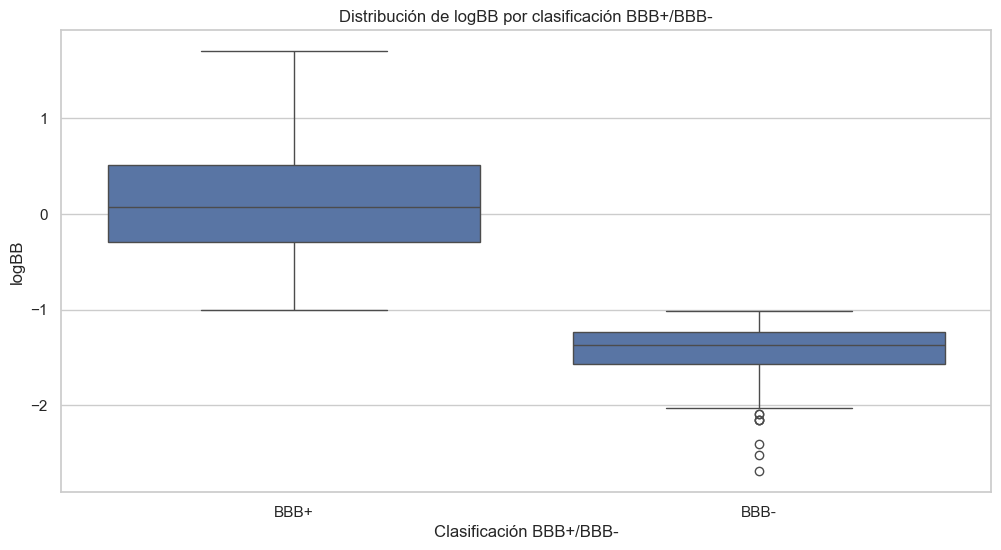

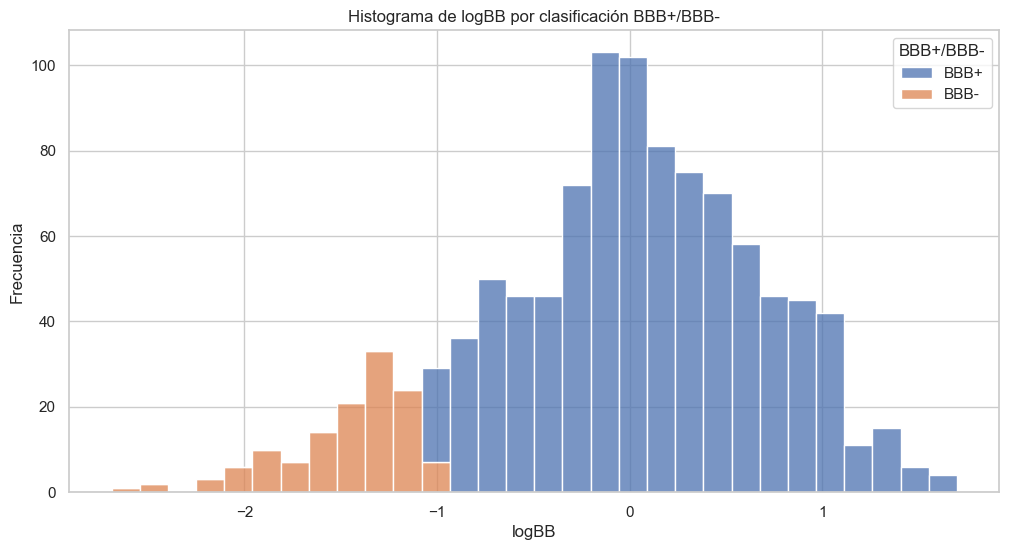

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot para la distribución de logBB
plt.figure(figsize=(12, 6))
sns.boxplot(x='BBB+/BBB-', y='logBB', data=Data1)
plt.title('Distribución de logBB por clasificación BBB+/BBB-')
plt.xlabel('Clasificación BBB+/BBB-')
plt.ylabel('logBB')
plt.show()

# Histograma de logBB para cada clasificación
plt.figure(figsize=(12, 6))
sns.histplot(data=Data1, x='logBB', hue='BBB+/BBB-', multiple='stack', bins=30)
plt.title('Histograma de logBB por clasificación BBB+/BBB-')
plt.xlabel('logBB')
plt.ylabel('Frecuencia')
plt.show()


In [14]:
from rdkit import Chem
from rdkit.Chem import Crippen

# Función para calcular LogP y manejar casos especiales
def calculate_logP(smiles):
    """
    Calcula el LogP (coeficiente de partición octanol-agua) para una molécula 
    basada en su cadena SMILES.
    
    Dado que los datos de LogBB (coeficiente de partición cerebro-sangre) no 
    están disponibles, el LogP se utiliza como un indicador alternativo de 
    lipofilia. El LogP ayuda a inferir la capacidad de las moléculas para 
    atravesar la barrera hematoencefálica (BBB), proporcionando una aproximación 
    práctica en ausencia de datos experimentales directos.
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        try:
            logP = Crippen.MolLogP(mol)
            return logP
        except Exception as e:
            print(f"Error calculando LogP para {smiles}: {e}")
            return None
    else:
        print(f"SMILES inválido: {smiles}")
        return None

# Aplicar el cálculo de LogP a cada molécula en la columna SMILES
Data1['LogP'] = Data1['SMILES'].apply(calculate_logP)

# Mostrar algunos resultados para verificar
print(Data1[['SMILES', 'LogP']].head(10))

# Guardar el DataFrame actualizado en un nuevo archivo Excel
ruta_archivo_actualizado = "Data1_con_LogP.xlsx"  # Cambia este nombre si es necesario
Data1.to_excel(ruta_archivo_actualizado, index=False)

print("Cálculo de LogP completado y guardado en el archivo.")


                                         SMILES    LogP
1058                                  BrC(Br)Br  2.4547
5440                Brc1c(NC2=NCCN2)ccc2nccnc12  1.7634
853               Brc1cc(Br)c(NC2=NCCN2)c(Br)c1  3.3452
738                     Brc1cccc(Br)c1NC1=NCCN1  2.5827
544                                           C  0.6361
1059                               C#CC(C)(O)CC  0.7806
1060                         C#CC(O)(/C=C/Cl)CC  1.5132
4105                           C#CC(O)(C=CCl)CC  1.5132
1061                      C#CC(OC(N)=O)c1ccccc1  1.4562
780   C#CC1(O)CCC2C3C(C)CC4=C(CCC(=O)C4)C3CCC21  3.4925
Cálculo de LogP completado y guardado en el archivo.


* En la presente investigación, la elección de calcular LogP en lugar de LogBB se debe a la limitación en la disponibilidad de datos de LogBB para un número significativo de moléculas en la base de datos. El LogBB es un parámetro específico que mide la distribución de una molécula entre la sangre y el cerebro, y su disponibilidad puede ser limitada debido a la falta de estudios experimentales específicos para muchas moléculas.

* Dado que el LogP es una medida indirecta de la lipofilia de una molécula, que influye en su capacidad para atravesar membranas biológicas, su cálculo proporciona una aproximación útil en ausencia de datos directos de LogBB. La lipofilia, medida por el LogP, es un factor importante en la determinación de la capacidad de una molécula para cruzar la BBB, ya que las moléculas más lipofílicas tienden a tener una mayor probabilidad de atravesar la barrera.

* Por lo tanto, al calcular el LogP para las moléculas, se obtiene un parámetro relevante que puede servir como sustituto aproximado en la ausencia de datos experimentales de LogBB, facilitando la realización de análisis y la toma de decisiones en la investigación de permeabilidad de moléculas.

Esta metodología permite avanzar en el estudio y la evaluación de moléculas con potencial para aplicaciones terapéuticas, proporcionando un valor predictivo que complementa el análisis existente en el contexto de la investigación sobre la barrera hematoencefálica.

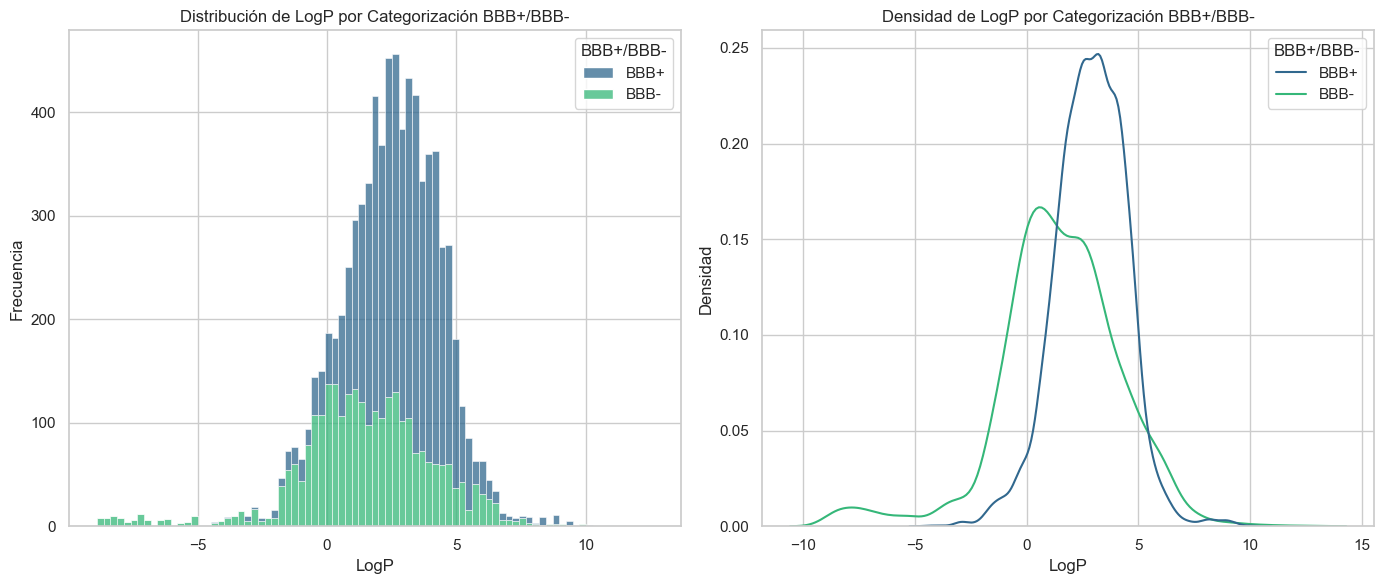

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# Crear una figura con dos subgráficas
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de distribución de LogP
sns.histplot(data=Data1, x='LogP', hue='BBB+/BBB-', multiple='stack', ax=ax[0], palette='viridis')
ax[0].set_title('Distribución de LogP por Categorización BBB+/BBB-')
ax[0].set_xlabel('LogP')
ax[0].set_ylabel('Frecuencia')

# Gráfico de densidad de LogP
sns.kdeplot(data=Data1, x='LogP', hue='BBB+/BBB-', common_norm=False, ax=ax[1], palette='viridis')
ax[1].set_title('Densidad de LogP por Categorización BBB+/BBB-')
ax[1].set_xlabel('LogP')
ax[1].set_ylabel('Densidad')

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()


In [ ]:
# Instalar dependencias
%pip install mordred rdkit

In [47]:
import pandas as pd
from mordred import Calculator, descriptors
from rdkit import Chem
import numpy as np
from tqdm import tqdm
import warnings

# Ignorar advertencias de Runtime
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Inicializar el calculador de Mordred
calc = Calculator(descriptors, ignore_3D=True)

# Función para calcular descriptores desde SMILES
def calculate_descriptors(smiles):
    """
    Calcula los descriptores para una molécula basada en su cadena SMILES.
    Si la molécula no es válida, devuelve una serie con valores None.
    """
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        features = calc(mol)
        # Verifica los valores de los descriptores
        numeric_features = {str(descriptor): value for descriptor, value in features.items() if isinstance(value, (int, float))}
        
        # Imprimir valores extremos para diagnóstico
        for descriptor, value in numeric_features.items():
            if value > 1e10 or value < -1e10:  # Ajusta estos límites según tus necesidades
                print(f"Descriptor {descriptor} tiene un valor extremo: {value}")
        
        return pd.Series(numeric_features)
    else:
        # Devuelve una serie con valores None si la molécula no es válida
        return pd.Series([None]*len(calc.descriptors), index=[str(desc) for desc in calc.descriptors])

# Configurar tqdm para mostrar progreso en Pandas
tqdm.pandas(desc="Calculando descriptores")

# Aplicar la función a la columna SMILES de Data1
descriptors_df = Data1['SMILES'].progress_apply(calculate_descriptors)

# Eliminar columnas con valores faltantes
descriptors_df.dropna(axis=1, inplace=True)

# Unir los descriptores con los datos originales
data_with_descriptors = pd.concat([Data1, descriptors_df], axis=1)

print("Descriptores numéricos calculados y guardados en el archivo.")


Calculando descriptores:   3%|▎         | 256/7807 [00:31<16:39,  7.55it/s]

Descriptor WPath tiene un valor extremo: 22500001273


Calculando descriptores:  71%|███████   | 5558/7807 [11:23<05:16,  7.11it/s]

Descriptor WPath tiene un valor extremo: 36000001668


Calculando descriptores:  74%|███████▍  | 5762/7807 [11:55<08:18,  4.10it/s]

Descriptor WPath tiene un valor extremo: 378200033329


Calculando descriptores:  82%|████████▏ | 6425/7807 [13:50<01:40, 13.72it/s]

Descriptor WPath tiene un valor extremo: 10500000479


Calculando descriptores: 100%|██████████| 7807/7807 [17:12<00:00,  7.56it/s]

Descriptores numéricos calculados y guardados en el archivo.


In [17]:
import pandas as pd
from mordred import Calculator, descriptors
from rdkit import Chem
import numpy as np
from tqdm import tqdm
import warnings

# Ignorar advertencias de Runtime
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Inicializar el calculador de Mordred
calc = Calculator(descriptors, ignore_3D=True)

def handle_extreme_values(value, min_value=-1e10, max_value=1e10):
    if value < min_value or value > max_value:
        return np.nan  # O maneja de otra manera
    return value

def validate_molecule(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None, False
    return mol, True

# Función para calcular descriptores desde SMILES
def calculate_descriptors(smiles):
    mol, is_valid = validate_molecule(smiles)
    if not is_valid:
        return pd.Series([None]*len(calc.descriptors), index=[str(desc) for desc in calc.descriptors])
    
    features = calc(mol)
    numeric_features = {str(descriptor): handle_extreme_values(value) for descriptor, value in features.items() if isinstance(value, (int, float))}
    
    # Imprimir valores extremos para diagnóstico
    for descriptor, value in numeric_features.items():
        if np.isnan(value):
            with open("extreme_values_log.txt", "a") as f:
                f.write(f"{smiles}, Descriptor {descriptor} tiene un valor extremo: {value}\n")
    
    return pd.Series(numeric_features)

# Configurar tqdm para mostrar progreso en Pandas
tqdm.pandas(desc="Calculando descriptores")

# Aplicar la función a la columna SMILES de Data1
descriptors_df = Data1['SMILES'].progress_apply(calculate_descriptors)

# Eliminar columnas con un alto porcentaje de valores faltantes
threshold = 0.1  # Permite hasta un 10% de valores faltantes
descriptors_df = descriptors_df.dropna(thresh=int((1-threshold)*len(descriptors_df)), axis=1)

# Unir los descriptores con los datos originales
data_with_descriptors = pd.concat([Data1, descriptors_df], axis=1)

print("Descriptores numéricos calculados y guardados en el archivo.")


Calculando descriptores: 100%|██████████| 7807/7807 [18:12<00:00,  7.15it/s]

Descriptores numéricos calculados y guardados en el archivo.


In [18]:
# Mostrar la cantidad de filas y columnas después de eliminar columnas con más del 10% de valores nulos
num_filas, num_columnas = descriptors_df.shape
print(f"El DataFrame tiene {num_filas} filas y {num_columnas} columnas después de eliminar columnas con más del 10% de valores nulos.")


El DataFrame tiene 7807 filas y 1425 columnas después de eliminar columnas con más del 10% de valores nulos.


In [19]:
import pandas as pd
from mordred import Calculator, descriptors
from rdkit import Chem
import numpy as np
from tqdm import tqdm
import warnings

# Ignorar advertencias de Runtime
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Inicializar el calculador de Mordred
calc = Calculator(descriptors, ignore_3D=True)

def handle_extreme_values(value, min_value=-1e10, max_value=1e10):
    if value < min_value or value > max_value:
        return np.nan  # O maneja de otra manera
    return value

def validate_molecule(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return None, False
    return mol, True

# Función para calcular descriptores desde SMILES
def calculate_descriptors(smiles):
    mol, is_valid = validate_molecule(smiles)
    if not is_valid:
        return pd.Series([None]*len(calc.descriptors), index=[str(desc) for desc in calc.descriptors])
    
    features = calc(mol)
    numeric_features = {str(descriptor): handle_extreme_values(value) for descriptor, value in features.items() if isinstance(value, (int, float))}
    
    # Imprimir valores extremos para diagnóstico
    for descriptor, value in numeric_features.items():
        if np.isnan(value):
            with open("extreme_values_log.txt", "a") as f:
                f.write(f"{smiles}, Descriptor {descriptor} tiene un valor extremo: {value}\n")
    
    return pd.Series(numeric_features)

# Configurar tqdm para mostrar progreso en Pandas
tqdm.pandas(desc="Calculando descriptores")

# Aplicar la función a la columna SMILES de Data1
descriptors_df = Data1['SMILES'].progress_apply(calculate_descriptors)

# Eliminar columnas con cualquier valor faltante
descriptors_df.dropna(axis=1, inplace=True)

# Unir los descriptores con los datos originales
data_with_descriptors = pd.concat([Data1, descriptors_df], axis=1)

print("Descriptores numéricos calculados y guardados en el archivo.")


Calculando descriptores: 100%|██████████| 7807/7807 [17:49<00:00,  7.30it/s]

Descriptores numéricos calculados y guardados en el archivo.


In [20]:
# Verificar el número de filas y columnas del DataFrame final
print(f"El DataFrame tiene {data_with_descriptors.shape[0]} filas y {data_with_descriptors.shape[1]} columnas.")

El DataFrame tiene 7807 filas y 749 columnas.


In [21]:
# Verificar si hay columnas con valores nulos
missing_values = data_with_descriptors.isnull().sum()
if missing_values.any():
    print("Columnas con valores nulos:")
    print(missing_values[missing_values > 0])
else:
    print("No hay columnas con valores nulos.")


Columnas con valores nulos:
name          1109
IUPAC_name    1637
CID           1637
logBB         6749
threshold     4186
comments      7789
dtype: int64


In [25]:
import pandas as pd
import os

# Asegúrate de que la carpeta 'nuevo' exista en tu escritorio
folder_path = os.path.expanduser("~/Desktop/nuevo")

# Crear la carpeta si no existe
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Ruta completa del archivo CSV
file_path = os.path.join(folder_path, "data_with_descriptors.csv")

# Guardar el DataFrame con descriptores en el archivo CSV
data_with_descriptors.to_csv(file_path, index=False)

print(f"Archivo guardado en: {file_path}")


Archivo guardado en: C:\Users\USUARIO/Desktop/nuevo\data_with_descriptors.csv
